# Code to create figure A.3:
### Sensitivity Analysis Plot

Used in the manuscript,  
Evaporative Moisture Sources of Colorado’s Front Range: A Case Study of the Exceptionally Wet May-July Season of 2023

## Import statements

In [1]:
#import statements
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

DATA_DIRECTORY = '/Users/kathum/Research/COPEX/aggregated_files/wam_output/'
SAVE_DIRECTORY = '/Users/kathum/Research/COPEX/figures/'

## Function: Calculate and Plot Sensitivity Results
#### **Parameters**:  
- **variable**: String representing the desired varibale to show. Choose from:
    - 'e_track'
    - 'tagged_precip'
- **main_data_directory**: String of the file path to the main wam2layers model output data directory.
- **save_plot**:Boolean indicating whether you would like this plot saved or not.
    -  Default = False
- **save_plot_name**: String indicating the name and file type (.img or .png) you wish to save the plot as.
    -  Default = 'unamed_plot.png'

#### **Output**:  
- 2 subplots:
    - First plot: Timeseries of total monthly e-track or tagged precip (mm/month) for both sensitivity test runs
    - Second plot: Timeseries of total monthly Percent Error.

In [8]:
def plot_sensitivity_test_results(variable, main_data_directory, save_plot = False, save_plot_name='unamed_plot.png'):
    #read in all netcdfs from each seperate run
    global_backtrack = xr.open_mfdataset(main_data_directory + 'sensitivity_analysis_dec2015-2019/global_nFrontRange_dec2015-2019/*.nc')[variable]
    nHemis_backtrack = xr.open_mfdataset(main_data_directory + 'sensitivity_analysis_dec2015-2019/aggregated_co_altclimate_nfr_dec2015_2019/*.nc')[variable]
    area = xr.open_dataset('/Users/kathum/Research/area_grids/quarter_degree_area_grid_all_lat_lon.nc')
    #convert global from mm to m^3
    global_backtrack = (global_backtrack/1000)*area['area_m2']
    #sum over lat and longitude
    global_backtrack = global_backtrack.sum(['latitude','longitude'])
    nHemis_backtrack = nHemis_backtrack.sum(['latitude','longitude'])
    #constrained_backtrack = constrained_backtrack.sum(['latitude','longitude'])
    
    #calculate difference in total variable for the entire time period and lat/lon
    perc_error_nhemis = (global_backtrack.values-nHemis_backtrack.values)/global_backtrack.values *100
    tot_perc_error_nhemis = (sum(global_backtrack.values)-sum(nHemis_backtrack.values))/sum(global_backtrack).values *100
   
    #Create Plot-------------------------------
    #plot total daily ET tracked for the whole study region
    fig, axs = plt.subplots(2,1,figsize=(14,6), sharex=True)
    
    #Create top plot
    axs[0].plot(global_backtrack['time'], global_backtrack.values,label='Entire Globe')
    axs[0].plot(nHemis_backtrack['time'], nHemis_backtrack.values,label='N. Hemisphere', linestyle = '--')

    #Create bottom plot
    axs[1].plot(global_backtrack['time'], perc_error_nhemis, label = 'N.Hemisphere % Error')

    #Set some plot settigns for both subplots
    subplt_titles = ['Total Tracked Evaporation of the Front Range','Percent Error Overtime']
    ylabels = ['E-Track (m^3/month)','Percent Error (%)']
    for i,axis in enumerate(axs.flat):
        axs[i].legend(loc='best')
        axs[i].set_title(subplt_titles[i])
        axs[i].set_ylabel(ylabels[i]) 
        
    #axs[1].text( "(a) my label", size=12, ha="center")
    print('Total E-Track percent error N. Hemisphere: ', np.round(tot_perc_error_nhemis, 2), '%')
    #print('Total '+variable+ ' percent error Lat & Lon Box: ', np.round(tot_perc_error_const, 2), '%')
    if save_plot == True:
        plt.savefig(SAVE_DIRECTORY+ save_plot_name)
    return global_backtrack

## Main code

Total E-Track percent error N. Hemisphere:  0.75 %


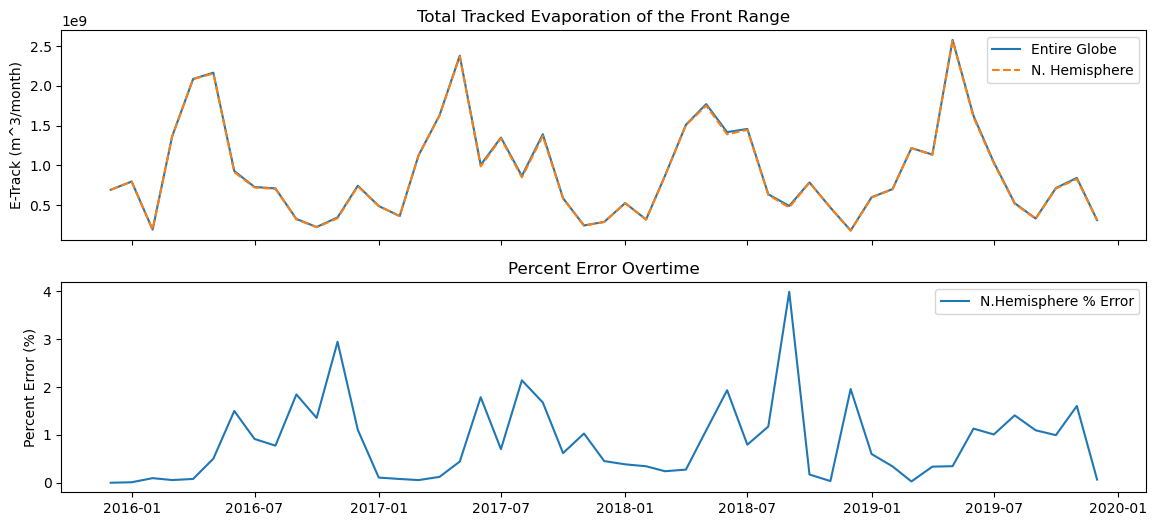

In [9]:
globe = plot_sensitivity_test_results(variable = 'e_track',
                              main_data_directory= DATA_DIRECTORY,
                              save_plot = True, 
                              save_plot_name = 'sensitivity_test_results.png')
